In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [2]:
# Load the data from the CSV file
data = pd.read_csv('pose_data.csv')

In [3]:
# Explore the data
print("Data Sample:")
print(data.head())

Data Sample:
   Frame  Keypoint Score         X         Y
0    175        0.307148  0.321415  0.306642
1    176        0.305169  0.318596  0.303682
2    177        0.303555  0.318159  0.302236
3    179        0.301417  0.312528  0.299376
4    180        0.302879  0.315368  0.301839


In [4]:
# Summary statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
             Frame  Keypoint Score            X            Y
count  1371.000000     1371.000000  1371.000000  1371.000000
mean   1044.711160        0.361255     0.590045     0.577759
std     553.791659        0.061073     0.132571     0.133630
min     175.000000        0.300033     0.310661     0.295873
25%     575.500000        0.323736     0.480886     0.466110
50%    1005.000000        0.340716     0.620797     0.608895
75%    1362.500000        0.360858     0.688966     0.678096
max    2104.000000        0.499283     0.767089     0.757992


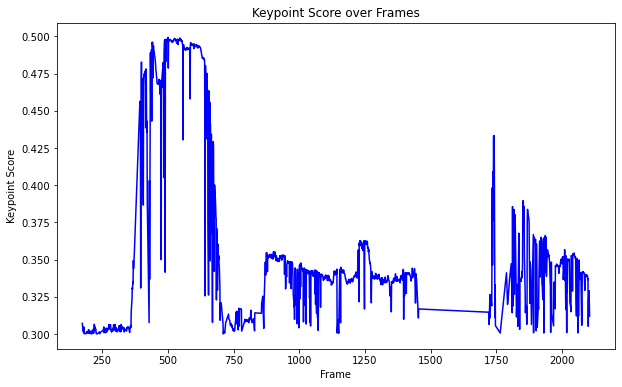

In [5]:
# Plotting the keypoint scores
plt.figure(figsize=(10, 6))
plt.plot(data['Frame'], data['Keypoint Score'], color='blue')
plt.xlabel('Frame')
plt.ylabel('Keypoint Score')
plt.title('Keypoint Score over Frames')
plt.show()

In [6]:
# Anomaly detection using Isolation Forest
X = data[['Frame', 'Keypoint Score', 'X', 'Y']]
clf = IsolationForest(contamination=0.05)
clf.fit(X)

c:\Users\K1\anaconda3\envs\casus\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.05)

In [7]:
# Add anomaly detection results to the dataframe
data['Anomaly'] = pd.Series(clf.predict(X))
data['Anomaly'] = data['Anomaly'].map({1: 0, -1: 1})

In [8]:
# Number of anomalies detected
num_anomalies = data['Anomaly'].sum()
num_normal = len(data) - num_anomalies
print("\nAnomaly Detection:")
print(f"Number of anomalies detected: {num_anomalies}")
print(f"Number of normal data points: {num_normal}")


Anomaly Detection:
Number of anomalies detected: 69
Number of normal data points: 1302


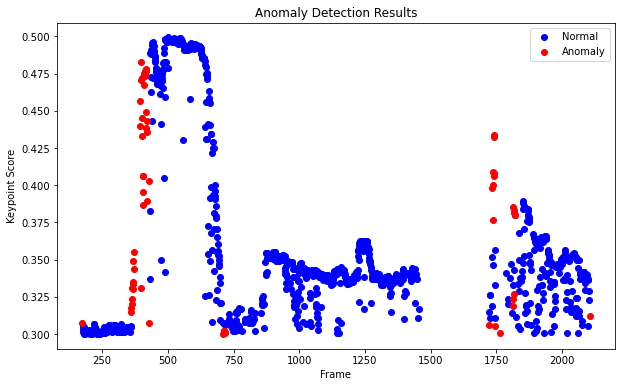

In [9]:
# Plotting the anomalies
plt.figure(figsize=(10, 6))
plt.scatter(data[data['Anomaly'] == 0]['Frame'], data[data['Anomaly'] == 0]['Keypoint Score'], color='blue', label='Normal')
plt.scatter(data[data['Anomaly'] == 1]['Frame'], data[data['Anomaly'] == 1]['Keypoint Score'], color='red', label='Anomaly')
plt.xlabel('Frame')
plt.ylabel('Keypoint Score')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()

In [10]:
# Generate the report
report = f"""
Anomaly Detection Report
------------------------
Number of anomalies detected: {num_anomalies}
Number of normal data points: {num_normal}

Summary Statistics:
{data.describe()}

Anomaly Detection Results:
{data[['Frame', 'Keypoint Score', 'X', 'Y', 'Anomaly']]}
"""

In [11]:
# Save the report to a file
with open('anomaly_detection_report.txt', 'w') as file:
    file.write(report)

In [12]:
print("\nAnomaly Detection Report has been generated and saved as 'anomaly_detection_report.txt'.")


Anomaly Detection Report has been generated and saved as 'anomaly_detection_report.txt'.
